In [190]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db

# Fetch the service account key JSON file contents
cred = credentials.Certificate('./db_key/spacewars-49e35-firebase-adminsdk-rrf8b-24a9906067.json')
# Initialize the app with a service account, granting admin privileges
try:
    firebase_admin.initialize_app(cred, {
        'databaseURL': "https://spacewars-49e35-default-rtdb.asia-southeast1.firebasedatabase.app/"
    })
except:
    pass

ref = db.reference('/user_stat')

In [191]:
def connect_db(path):
    # Fetch the service account key JSON file contents
    cred = credentials.Certificate('./db_key/spacewars-49e35-firebase-adminsdk-rrf8b-24a9906067.json')
    try:
        # Initialize the app with a service account, granting admin privileges
        firebase_admin.initialize_app(cred, {
            'databaseURL': "https://spacewars-49e35-default-rtdb.asia-southeast1.firebasedatabase.app/"
        })
    except:
        pass
    ref = db.reference(f'/{path}')
    return ref

def high_scores_top_list():
    ref = connect_db('highscore')
    snapshot = ref.order_by_value().get()
    sorted_snapshot = sorted(snapshot.items(), key=lambda x: x[1], reverse=True)
    name = []
    score = []
    for i in sorted_snapshot:
        name.append(i[0])
        score.append(i[1])
    return(name,score)

In [192]:
def top_5():
    ref = connect_db('score')
    snapshot = ref.order_by_value().limit_to_last(5).get()
    snapshot = sorted(snapshot.items(), key=lambda x: x[1], reverse=True)

    firebase_admin.delete_app(firebase_admin.get_app())

    return snapshot

In [193]:
import numpy as np
from sklearn.preprocessing import StandardScaler

# Assuming you already have the following code:
ref = connect_db('user_stat')
snapshot = ref.get()
#scaler = StandardScaler()
# Extract the desired list for each key
data = []
for key in snapshot:
    d = snapshot[key]
    print(d)
    data.append(d)
#     for k in snapshot[key]:
#         d = snapshot[key][k]
#         d = [float(x) for x in d]
#         #d = scaler.fit_transform(np.array(d).reshape(-1, 1))
#         #d = d.tolist()  # Convert the NumPy array to a list
#         data.append(d)
len(data)
data

{'a0': '493.6024096385542', 'a1': '473.39156626506025', 'a10': '48', 'a2': '18', 'a3': '33', 'a4': '36', 'a5': '3', 'a6': '6', 'a7': '83', 'a8': '35', 'a9': '63', 'timestamp': 1687690589.501408}
{'a0': '493.6024096385542', 'a1': '473.39156626506025', 'a10': '48', 'a2': '18', 'a3': '33', 'a4': '36', 'a5': '3', 'a6': '6', 'a7': '83', 'a8': '35', 'a9': '63', 'timestamp': 1687689245.3251956}
{'a0': '473.0', 'a1': '243.21052631578948', 'a10': '22', 'a2': '12', 'a3': '0', 'a4': '0', 'a5': '0', 'a6': '2', 'a7': '12', 'a8': '19', 'a9': '10', 'timestamp': 1687689245.3251956}
{'a0': '404.5365853658537', 'a1': '389.0121951219512', 'a10': '27', 'a2': '12', 'a3': '6', 'a4': '8', 'a5': '2', 'a6': '3', 'a7': '30', 'a8': '38', 'a9': '21', 'timestamp': 1687689245.3251956}
{'a0': '496.3333333333333', 'a1': '434.41269841269843', 'a10': '41', 'a2': '16', 'a3': '17', 'a4': '22', 'a5': '5', 'a6': '5', 'a7': '47', 'a8': '30', 'a9': '41', 'timestamp': 1687689245.3251956}
{'a0': '441.8955223880597', 'a1': '447

[{'a0': '493.6024096385542',
  'a1': '473.39156626506025',
  'a10': '48',
  'a2': '18',
  'a3': '33',
  'a4': '36',
  'a5': '3',
  'a6': '6',
  'a7': '83',
  'a8': '35',
  'a9': '63',
  'timestamp': 1687690589.501408},
 {'a0': '493.6024096385542',
  'a1': '473.39156626506025',
  'a10': '48',
  'a2': '18',
  'a3': '33',
  'a4': '36',
  'a5': '3',
  'a6': '6',
  'a7': '83',
  'a8': '35',
  'a9': '63',
  'timestamp': 1687689245.3251956},
 {'a0': '473.0',
  'a1': '243.21052631578948',
  'a10': '22',
  'a2': '12',
  'a3': '0',
  'a4': '0',
  'a5': '0',
  'a6': '2',
  'a7': '12',
  'a8': '19',
  'a9': '10',
  'timestamp': 1687689245.3251956},
 {'a0': '404.5365853658537',
  'a1': '389.0121951219512',
  'a10': '27',
  'a2': '12',
  'a3': '6',
  'a4': '8',
  'a5': '2',
  'a6': '3',
  'a7': '30',
  'a8': '38',
  'a9': '21',
  'timestamp': 1687689245.3251956},
 {'a0': '496.3333333333333',
  'a1': '434.41269841269843',
  'a10': '41',
  'a2': '16',
  'a3': '17',
  'a4': '22',
  'a5': '5',
  'a6': '

In [194]:
import pandas as pd
df = pd.DataFrame(data)

display(df)

,a0,a1,a10,a2,a3,a4,a5,a6,a7,a8,a9,timestamp
0,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687691e+09
1,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687689e+09
2,473.0,243.21052631578948,22,12,0,0,0,2,12,19,10,1.687689e+09
3,404.5365853658537,389.0121951219512,27,12,6,8,2,3,30,38,21,1.687689e+09
4,496.3333333333333,434.41269841269843,41,16,17,22,5,5,47,30,41,1.687689e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
509,280.01875,348.80625,48,18,106,247,141,6,99,92,136,1.687703e+09
510,436.815789,492.243421,40,10,94,113,19,6,83,42,123,1.687703e+09
511,426.490385,486.153846,29,9,50,60,10,4,55,30,70,1.687703e+09
512,301.245968,409.310484,61,26,121,221,100,7,123,109,155,1.687703e+09


In [195]:
from river import preprocessing
scaler = preprocessing.StandardScaler()

In [196]:
df_train = df
display(df_train)

,a0,a1,a10,a2,a3,a4,a5,a6,a7,a8,a9,timestamp
0,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687691e+09
1,493.6024096385542,473.39156626506025,48,18,33,36,3,6,83,35,63,1.687689e+09
2,473.0,243.21052631578948,22,12,0,0,0,2,12,19,10,1.687689e+09
3,404.5365853658537,389.0121951219512,27,12,6,8,2,3,30,38,21,1.687689e+09
4,496.3333333333333,434.41269841269843,41,16,17,22,5,5,47,30,41,1.687689e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
509,280.01875,348.80625,48,18,106,247,141,6,99,92,136,1.687703e+09
510,436.815789,492.243421,40,10,94,113,19,6,83,42,123,1.687703e+09
511,426.490385,486.153846,29,9,50,60,10,4,55,30,70,1.687703e+09
512,301.245968,409.310484,61,26,121,221,100,7,123,109,155,1.687703e+09


In [197]:
df_feature = df_train.loc[:, ['a2','a3','a4','a5','a6','a7','a8','a9','a10']]  # Select multiple columns
display(df_feature)

,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,18,33,36,3,6,83,35,63,48
1,18,33,36,3,6,83,35,63,48
2,12,0,0,0,2,12,19,10,22
3,12,6,8,2,3,30,38,21,27
4,16,17,22,5,5,47,30,41,41
...,...,...,...,...,...,...,...,...,...
509,18,106,247,141,6,99,92,136,48
510,10,94,113,19,6,83,42,123,40
511,9,50,60,10,4,55,30,70,29
512,26,121,221,100,7,123,109,155,61


In [198]:
nan_counts = df_feature.isna().sum()

print(nan_counts)

a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     1
a10    1
dtype: int64


In [199]:
df_feature = df_feature.fillna(0)
nan_counts = df_feature.isna().sum()

print(nan_counts)

a2     0
a3     0
a4     0
a5     0
a6     0
a7     0
a8     0
a9     0
a10    0
dtype: int64


In [200]:
df_feature = df_feature.astype(int)

In [201]:
def filter_outliner(df, column_name):
    q_low = df[column_name].quantile(0.0003) # mean-3sd
    q_hi  = df[column_name].quantile(0.9997) # mean+3sd
    df_filtered = df[(df[column_name] <= q_hi) & (df[column_name] >= q_low)]
    return df_filtered

# df =  filter_outliner(df, 'units')

for i in list(df_feature.columns):
    df_feature =  filter_outliner(df_feature, i)

In [202]:
df_feature_first = df_feature.copy()
df_feature_online = df_feature.copy()

In [203]:
df_feature_online

,a2,a3,a4,a5,a6,a7,a8,a9,a10
0,18,33,36,3,6,83,35,63,48
1,18,33,36,3,6,83,35,63,48
2,12,0,0,0,2,12,19,10,22
3,12,6,8,2,3,30,38,21,27
4,16,17,22,5,5,47,30,41,41
...,...,...,...,...,...,...,...,...,...
508,8,70,91,21,5,53,25,95,33
510,10,94,113,19,6,83,42,123,40
511,9,50,60,10,4,55,30,70,29
512,26,121,221,100,7,123,109,155,61


In [204]:
from river import cluster
from river import naive_bayes
from river import stream
import pickle

with open('streamkmeans_model_first.pkl', 'rb') as f:
    model_cluster_first = pickle.load(f)

with open('streamkmeans_model.pkl', 'rb') as f:
    model_cluster_online = pickle.load(f)

y_first = [model_cluster_first.predict_one(x) for x,_ in stream.iter_pandas(df_feature_first)]
y_online = [model_cluster_online.predict_one(x) for x,_ in stream.iter_pandas(df_feature_online)]


In [205]:
model_cluster_first.centers

{0: defaultdict(functools.partial(<bound method Random.gauss of <random.Random object at 0x000001621D30D660>>, 0, 1),
             {'a4': 0.6708029860445239,
              'a3': 0.3186921983761515,
              'a8': -0.8984157127713841,
              'a6': -0.4517691772006116,
              'a2': 0.41762130274839493,
              'a7': -0.3116668210167919,
              'a5': 0.7981858189554825,
              'a10': 0.04272832314041633,
              'a9': -0.437351109624463}),
 1: defaultdict(functools.partial(<bound method Random.gauss of <random.Random object at 0x000001621D30D660>>, 0, 1),
             {'a4': 121.45518176917287,
              'a3': 86.44639740691662,
              'a8': 53.938763508204644,
              'a6': 5.5141809480866435,
              'a2': 18.243097836256133,
              'a7': 89.54110770657475,
              'a5': 35.01205626588717,
              'a10': 45.823930073518724,
              'a9': 113.90744540336217}),
 2: defaultdict(functools.partial(<b

In [206]:
model_cluster_online.centers

{0: defaultdict(functools.partial(<bound method Random.gauss of <random.Random object at 0x000001621D30B830>>, 0, 1),
             {'a4': -1.109309922144285,
              'a3': 0.6872060224188137,
              'a8': -0.3051947552718107,
              'a6': 1.2616365965815044,
              'a2': -0.06643744763323262,
              'a7': -0.3894029427137137,
              'a5': 1.026069686196198,
              'a10': -0.07594990423768061,
              'a9': -1.1560460567041362}),
 1: defaultdict(functools.partial(<bound method Random.gauss of <random.Random object at 0x000001621D30B830>>, 0, 1),
             {'a4': 163.0192141991523,
              'a3': 91.56339298735382,
              'a8': 77.14919746716737,
              'a6': 6.232186069045781,
              'a2': 19.04773531638417,
              'a7': 103.46400142194342,
              'a5': 71.46339472739032,
              'a10': 50.228560289504614,
              'a9': 122.25177572235857}),
 2: defaultdict(functools.partial(<bou

In [207]:
from collections import Counter
# Count the occurrences of each value in the list
counts = Counter(y_first)
# Print the counts
print('Streamkmeans(offline)')
for value, count in counts.items():
    print(f"{value} = {count}")

# Count the occurrences of each value in the list
counts = Counter(y_online)
# Print the counts
print('Streamkmeans(online)')
for value, count in counts.items():
    print(f"{value} = {count}")

Streamkmeans(offline)
2 = 139
0 = 70
3 = 215
1 = 82
Streamkmeans(online)
2 = 191
3 = 215
0 = 47
1 = 53


In [208]:
df_feature_first['Y'] = y_first
df_feature_online['Y'] = y_online

In [209]:
display(df_feature_first)
display(df_feature_online)

,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
0,18,33,36,3,6,83,35,63,48,2
1,18,33,36,3,6,83,35,63,48,2
2,12,0,0,0,2,12,19,10,22,0
3,12,6,8,2,3,30,38,21,27,3
4,16,17,22,5,5,47,30,41,41,3
...,...,...,...,...,...,...,...,...,...,...
508,8,70,91,21,5,53,25,95,33,2
510,10,94,113,19,6,83,42,123,40,1
511,9,50,60,10,4,55,30,70,29,2
512,26,121,221,100,7,123,109,155,61,1


,a2,a3,a4,a5,a6,a7,a8,a9,a10,Y
0,18,33,36,3,6,83,35,63,48,2
1,18,33,36,3,6,83,35,63,48,2
2,12,0,0,0,2,12,19,10,22,3
3,12,6,8,2,3,30,38,21,27,3
4,16,17,22,5,5,47,30,41,41,3
...,...,...,...,...,...,...,...,...,...,...
508,8,70,91,21,5,53,25,95,33,2
510,10,94,113,19,6,83,42,123,40,1
511,9,50,60,10,4,55,30,70,29,2
512,26,121,221,100,7,123,109,155,61,1


In [211]:
from sklearn.decomposition import PCA

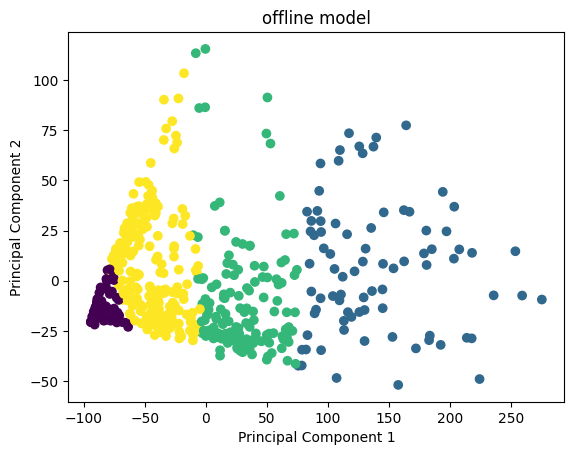

In [212]:
pca = PCA(n_components=2)  # Specify the number of components (2 in this example)
principal_components = pca.fit_transform(df_feature_first)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # Adjust column names as needed
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_feature_first['Y'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('offline model')
plt.show()

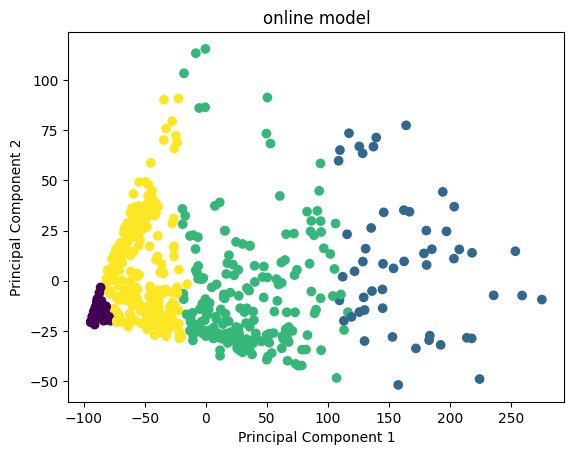

In [213]:


# pca = PCA(n_components=2)  # Specify the number of components (2 in this example)
principal_components = pca.fit_transform(df_feature_online)
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])  # Adjust column names as needed
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_feature_online['Y'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('online model')
plt.show()

In [149]:
mean_collected_coin = df_feature_first.groupby(['Y']).mean()['a2']
mean_enemies_kills = df_feature_first.groupby(['Y']).mean()['a3']

In [150]:
labels = []
num_labels = len(mean_collected_coin)
for i in range(num_labels):
    if i % 2 == 0:
        sorted_index = np.argsort(mean_collected_coin)
    else:
        sorted_index = np.argsort(mean_enemies_kills)

    sorted_index = list(sorted_index)
    sorted_index.reverse()
    for max_index in sorted_index:
        if max_index not in labels:
            labels.append(max_index)
            break

print(labels)

LABELS = {
    labels[0]: 'Hardcore Achiever',
    labels[1]: 'Hardcore Killer',
    labels[2]: 'Casual Achiever',
    labels[3]: 'Casual Killer',
}
print(LABELS)

[1, 2, 3, 0]
{1: 'Hardcore Achiever', 2: 'Hardcore Killer', 3: 'Casual Achiever', 0: 'Casual Killer'}


In [151]:
df_feature_first['Y'] = df_feature_first['Y'].map(LABELS)
df_feature_online['Y'] = df_feature_online['Y'].map(LABELS)

In [152]:
y_for_clf_first = df_feature_first.pop('Y')
y_for_clf_online = df_feature_online.pop('Y')

In [153]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_feature_first, y_for_clf_first, test_size=0.30, random_state=42)
X_train1, X_test1, y_train1, y_test1 = train_test_split(df_feature_online, y_for_clf_online, test_size=0.30, random_state=42)

In [154]:
display(X_test)

,a2,a3,a4,a5,a6,a7,a8,a9,a10
174,23,4,4,0,4,36,33,24,43
276,18,5,7,2,4,45,55,25,38
497,13,6,7,1,3,22,28,21,28
73,3,8,9,1,2,17,1,18,13
458,0,0,0,0,1,0,0,5,5
...,...,...,...,...,...,...,...,...,...
446,3,0,0,0,1,6,4,5,8
23,5,54,66,12,4,66,0,74,25
227,10,0,0,0,2,20,12,10,20
438,2,0,0,0,1,3,1,5,7


In [155]:
from river import evaluate
from river import metrics
from river import tree

with open('treeclassifier_model_first.pkl', 'rb') as f:
    model_clf_first = pickle.load(f)

with open('ExtremelyFastDecisionTreeClassifier_model.pkl', 'rb') as f:
    model_clf_online = pickle.load(f)

In [156]:
model_clf_first

ExtremelyFastDecisionTreeClassifier (
  grace_period=100
  max_depth=4
  min_samples_reevaluate=20
  split_criterion="gini"
  delta=1e-07
  tau=0.05
  leaf_prediction="nba"
  nb_threshold=0
  nominal_attributes=None
  splitter=GaussianSplitter (
    n_splits=10
  )
  binary_split=False
  max_size=100.
  memory_estimate_period=1000000
  stop_mem_management=False
  remove_poor_attrs=False
  merit_preprune=True
)

first



(dot.exe:12820): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


Accuracy: 86.18%


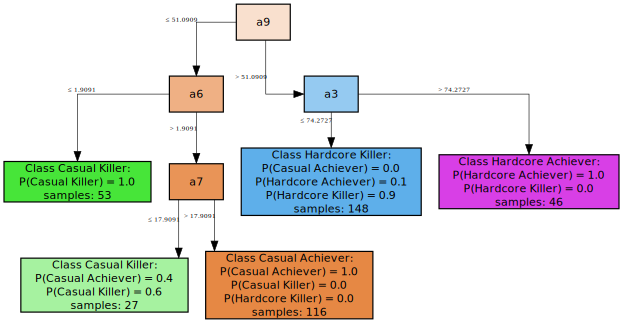

In [157]:
from river import metrics
from river import evaluate

metric = metrics.Accuracy()
print('first')
print(evaluate.progressive_val_score(stream.iter_pandas(X_test, y_test), model_clf_first, metric))
model_clf_first.draw()

Online



(dot.exe:20676): Pango-WARNING **: couldn't load font "trebuchet Not-Rotated 11", falling back to "Sans Not-Rotated 11", expect ugly output.


Accuracy: 85.86%


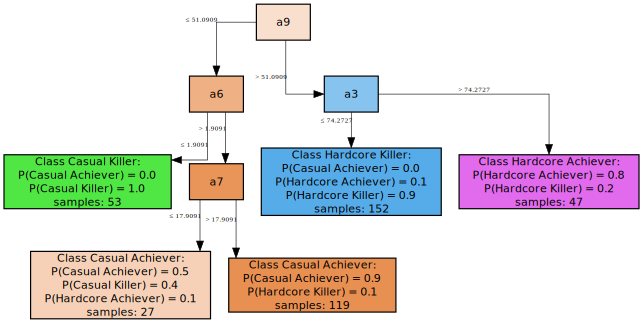

In [158]:
print('Online')
print(evaluate.progressive_val_score(stream.iter_pandas(X_test1, y_test1), model_clf_online, metric))
model_clf_online.draw()